In [1]:
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
PROJECT_DIR = r"C:\Users\tusha\OneDrive\Desktop\fight"
DATA_DIR = "data"

In [3]:
def get_data(name):
    file_name = f"{name}.csv"
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
df = get_data("GlobalTerrorism")

C:\Users\tusha\AppData\Local\Temp\ipykernel_22612\1032015928.py:4: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, encoding='ISO-8859-1')


In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [62]:
col_indices = [1,2,3,7,8,9,10,11,12,29]
df_final = df.iloc[0:10000,col_indices]

IndexError: positional indexers are out-of-bounds

In [63]:
df_final

,year,month,day,country,country_txt,region,region_txt,provstate,city,attack_type,dates
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,Assassination,1970/2/7
1,1970,1,1,130,Mexico,1,North America,Federal,Mexico city,Hostage Taking (Kidnapping),1970/1/1
2,1970,1,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,Assassination,1970/1/1
3,1970,1,1,78,Greece,8,Western Europe,Attica,Athens,Bombing/Explosion,1970/1/1
4,1970,1,1,101,Japan,4,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,1970/1/1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1980,1,14,83,Guatemala,2,Central America & Caribbean,Suchitepequez,Mazatenango,Unknown,1980/14/1
9996,1980,1,14,217,United States,1,North America,Indiana,Indianapolis,Armed Assault,1980/14/1
9997,1980,1,15,15,Austria,8,Western Europe,Vienna,Vienna,Bombing/Explosion,1980/15/1
9998,1980,1,15,97,Israel,10,Middle East & North Africa,Tel Aviv,Bat Yam,Bombing/Explosion,1980/15/1


In [64]:
df_final = df_final.rename(columns = {'attacktype1_txt':'attack_type','iyear':'year','imonth':'month','iday':'day'})

In [65]:
df_final.isnull().sum()

year            0
month           0
day             0
country         0
country_txt     0
region          0
region_txt      0
provstate      39
city            0
attack_type     0
dates           0
dtype: int64

In [66]:
def convert_to_string(df):
    int_col = df.select_dtypes(include = "int64").columns
    df[int_col] = df[int_col].astype('str')

In [67]:
convert_to_string(df_final)

In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         10000 non-null  object
 1   month        10000 non-null  object
 2   day          10000 non-null  object
 3   country      10000 non-null  object
 4   country_txt  10000 non-null  object
 5   region       10000 non-null  object
 6   region_txt   10000 non-null  object
 7   provstate    9961 non-null   object
 8   city         10000 non-null  object
 9   attack_type  10000 non-null  object
 10  dates        10000 non-null  object
dtypes: object(11)
memory usage: 859.5+ KB


In [69]:
df_final['day']= df_final.day.replace("0",'1')
df_final['month']= df_final.month.replace("0",'1')



In [70]:
df_final = df_final.assign(dates = lambda df_: df_['year']+'/'+df_['day']+'/'+df_['month'])

In [71]:
df_final.head(10)

,year,month,day,country,country_txt,region,region_txt,provstate,city,attack_type,dates
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,Assassination,1970/2/7
1,1970,1,1,130,Mexico,1,North America,Federal,Mexico city,Hostage Taking (Kidnapping),1970/1/1
2,1970,1,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,Assassination,1970/1/1
3,1970,1,1,78,Greece,8,Western Europe,Attica,Athens,Bombing/Explosion,1970/1/1
4,1970,1,1,101,Japan,4,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,1970/1/1
5,1970,1,1,217,United States,1,North America,Illinois,Cairo,Armed Assault,1970/1/1
6,1970,1,2,218,Uruguay,3,South America,Montevideo,Montevideo,Assassination,1970/2/1
7,1970,1,2,217,United States,1,North America,California,Oakland,Bombing/Explosion,1970/2/1
8,1970,1,2,217,United States,1,North America,Wisconsin,Madison,Facility/Infrastructure Attack,1970/2/1
9,1970,1,3,217,United States,1,North America,Wisconsin,Madison,Facility/Infrastructure Attack,1970/3/1


In [72]:
df_final

,year,month,day,country,country_txt,region,region_txt,provstate,city,attack_type,dates
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,Assassination,1970/2/7
1,1970,1,1,130,Mexico,1,North America,Federal,Mexico city,Hostage Taking (Kidnapping),1970/1/1
2,1970,1,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,Assassination,1970/1/1
3,1970,1,1,78,Greece,8,Western Europe,Attica,Athens,Bombing/Explosion,1970/1/1
4,1970,1,1,101,Japan,4,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,1970/1/1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1980,1,14,83,Guatemala,2,Central America & Caribbean,Suchitepequez,Mazatenango,Unknown,1980/14/1
9996,1980,1,14,217,United States,1,North America,Indiana,Indianapolis,Armed Assault,1980/14/1
9997,1980,1,15,15,Austria,8,Western Europe,Vienna,Vienna,Bombing/Explosion,1980/15/1
9998,1980,1,15,97,Israel,10,Middle East & North Africa,Tel Aviv,Bat Yam,Bombing/Explosion,1980/15/1


In [73]:
df_final.columns

Index(['year', 'month', 'day', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'attack_type', 'dates'],
      dtype='object')

In [74]:
def clean(df):
    return (
        df
        .drop_duplicates()
        .assign(**{
			col: df[col].str.strip()
			for col in df.select_dtypes(include="O").columns
		})
        .dropna(axis = 0)
        .assign(
			attack_type=lambda df_: (
				df_
				.attack_type
				.str.replace("Hostage Taking (Barricade Incident)", "Hostage Taking")
                .str.replace("Hostage Taking (Kidnapping)", "Hostage Taking")
                .str.replace("Bombing/Explosion", "Explosion")
                .str.replace("Facility/Infrastructure Attack", "Infrastructure Attack")
			))
    )

In [75]:
data = clean(df_final).drop(["country","region","year","day","month"],axis =1 )

In [76]:
data.head()

,country_txt,region_txt,provstate,city,attack_type,dates
1,Mexico,North America,Federal,Mexico city,Hostage Taking,1970/1/1
2,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,1970/1/1
3,Greece,Western Europe,Attica,Athens,Explosion,1970/1/1
4,Japan,East Asia,Fukouka,Fukouka,Infrastructure Attack,1970/1/1
5,United States,North America,Illinois,Cairo,Armed Assault,1970/1/1


In [77]:
data['dates'] = pd.to_datetime(data.dates,dayfirst = True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8364 entries, 1 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   country_txt  8364 non-null   object        
 1   region_txt   8364 non-null   object        
 2   provstate    8364 non-null   object        
 3   city         8364 non-null   object        
 4   attack_type  8364 non-null   object        
 5   dates        8364 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 457.4+ KB


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions

In [80]:
data.describe(include = "O")

,country_txt,region_txt,provstate,city,attack_type
count,8364,8364,8364,8364,8364
unique,108,11,596,1844,8
top,United Kingdom,Western Europe,Northern Ireland,Belfast,Explosion
freq,1436,3938,1312,676,3387


In [81]:
data.columns

Index(['country_txt', 'region_txt', 'provstate', 'city', 'attack_type',
       'dates'],
      dtype='object')

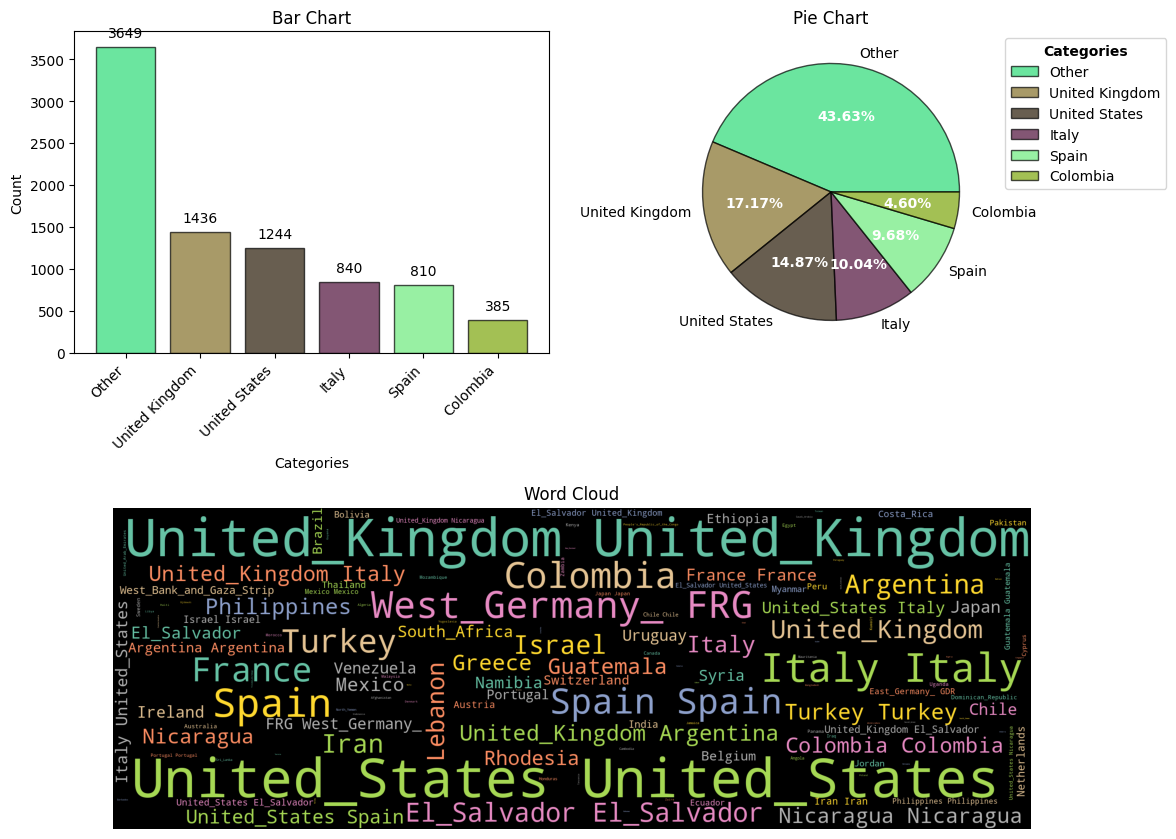

In [82]:
eda_helper_functions.cat_univar_plots(data, "country_txt",k=5)

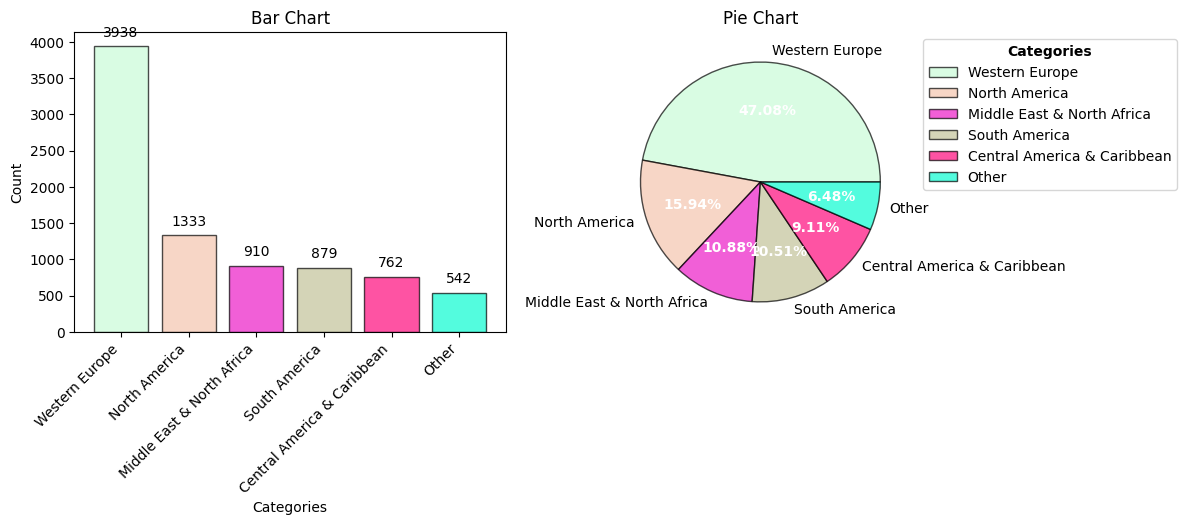

In [83]:
eda_helper_functions.cat_univar_plots(data, "region_txt",show_wordcloud=False,k=5)

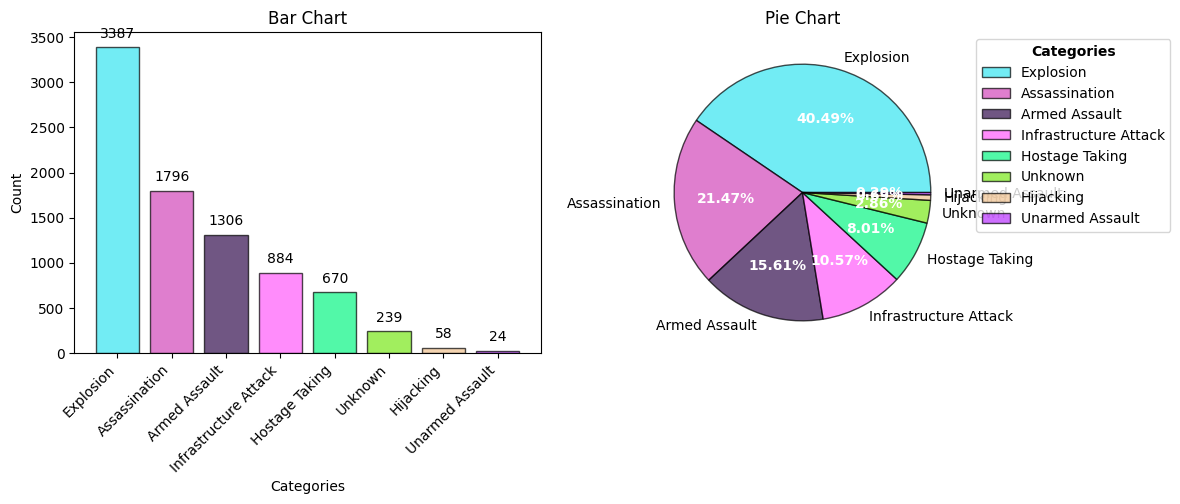

In [84]:
eda_helper_functions.cat_univar_plots(data, "attack_type",show_wordcloud=False)

C:\Users\tusha\OneDrive\Desktop\fight\notebooks\eda_helper_functions.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\tusha\OneDrive\Desktop\fight\notebooks\eda_helper_functions.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\tusha\OneDrive\Desktop\fight\notebooks\eda_helper_functions.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\tusha\OneDrive\Desktop\fight\notebooks\eda_helper_functions.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


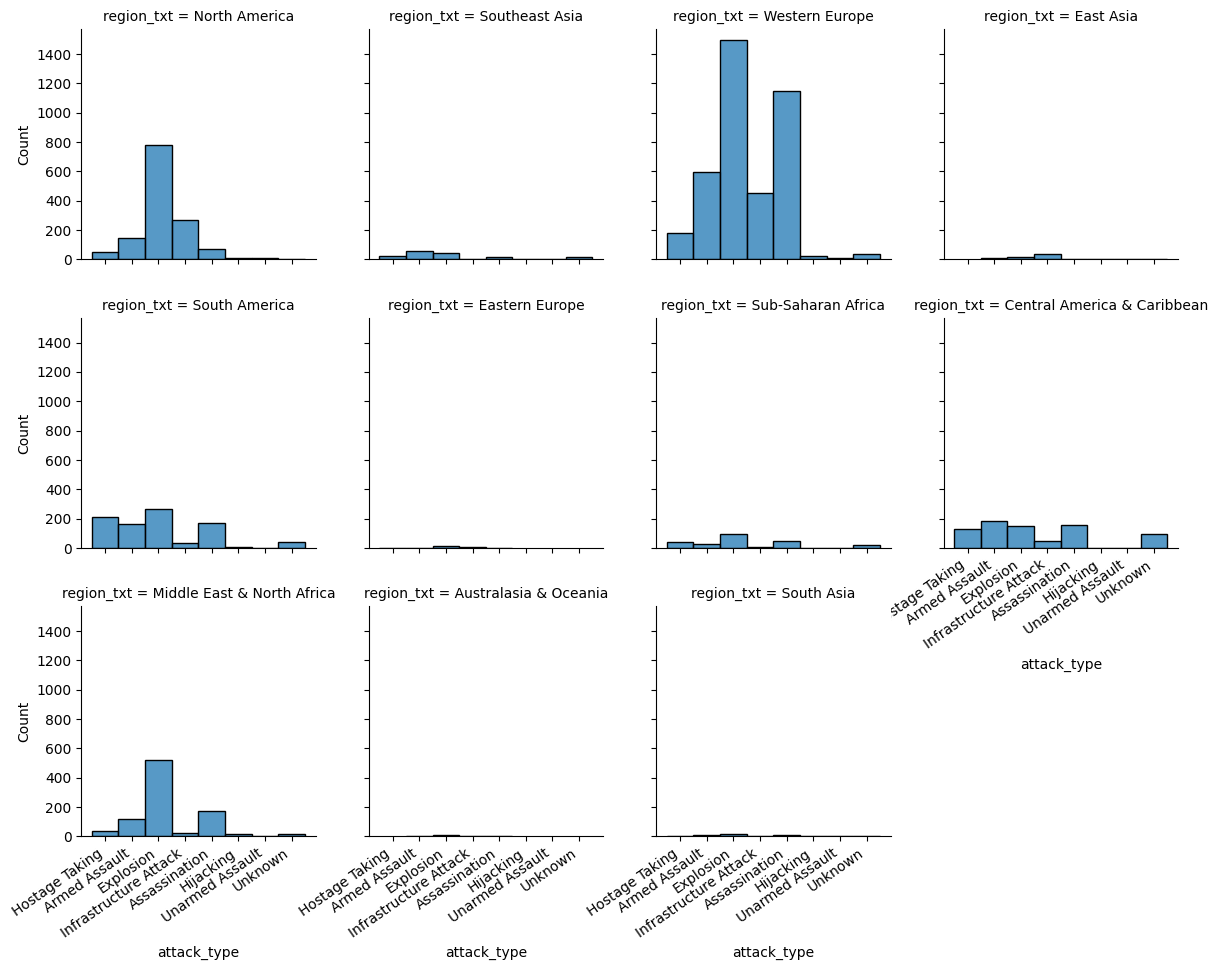

In [86]:
data_grid = sns.FacetGrid(
    data = data,
    col = "region_txt",
    col_wrap = 4
)

data_grid.map(sns.histplot,'attack_type')
for ax in data_grid.axes[7:]:
    eda_helper_functions.rotate_xlabels(ax)


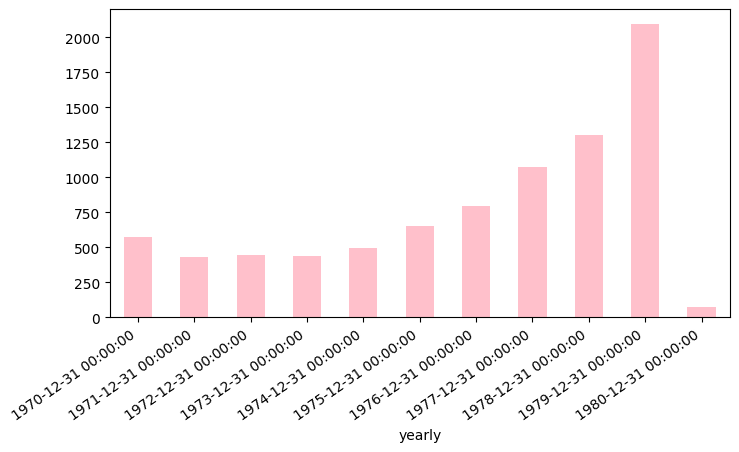

In [115]:
(
    data
    .groupby(pd.Grouper(key = 'dates',freq = "YE"))
    .count()
    # .set_axis(['March','April','May','June'],axis  = 0)
    .rename_axis(index = "yearly")
    .country_txt
    .plot(
        kind = 'bar',
        figsize = (8,4),
        color = "pink"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

<Axes: xlabel='attack_type'>

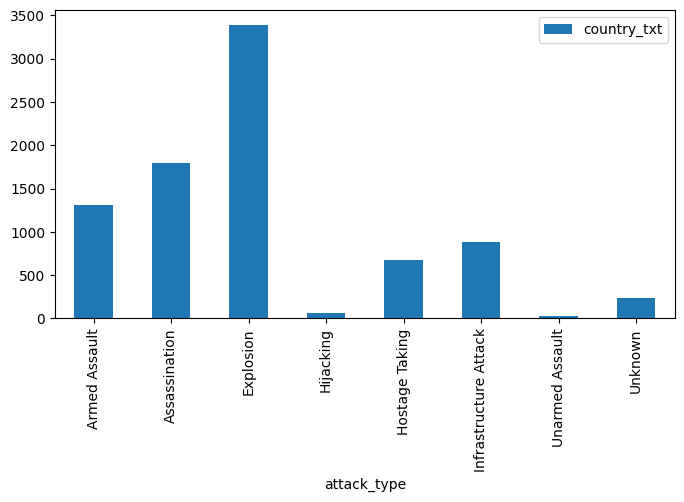

In [103]:
data.groupby(data.attack_type).count().country_txt.to_frame().plot(
        kind = 'bar',
        figsize = (8,4)
    )

